In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns

import scipy
import pywt
import mne

import sys
from tqdm import tqdm


sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *
from wavelet_utils import *
import glob
import os


#import seaborn as sns
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
mtrf_test = loadmat('/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_motor/motor_mTRF_data_30Hz/mTRFweights_motor_pre_10.mat')['weights'][0]

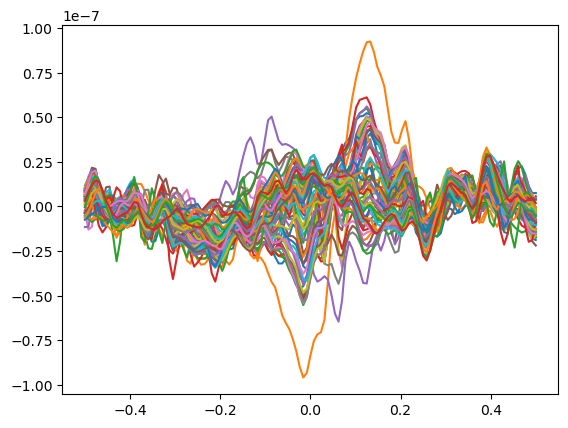

In [71]:
erp_times = create_erp_times(-0.5, 0.5, 128)
plt.plot(erp_times,mtrf_test);

In [13]:
from mne.time_frequency import tfr_array_morlet

In [67]:
freqs_itc = np.linspace(5, 30, 10)

In [65]:
mtrf_reshaped = mtrf_test.T
mtrf_reshaped = mtrf_reshaped[:, np.newaxis, :]

In [77]:
itc.shape

(1, 10, 129)

In [83]:
itc = tfr_array_morlet(mtrf_reshaped, sfreq=128, freqs= freqs_itc, n_cycles = 3, output = 'itc')


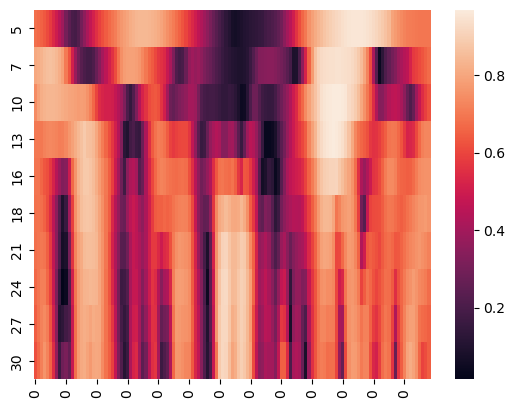

In [91]:
ax = sns.heatmap(itc[0], xticklabels=[int(x) for x in erp_times], yticklabels=[int(x) for x in freqs_itc])
xticks = ax.get_xticks()  # Get current x-axis tick locations
ax.set_xticks(xticks[::10]) 

---

In [16]:

wavelet_params = {
    'fs' :128 , # example sampling frequency in Hz
    'centerfreq' : 1 ,
    'bandwidth': 1.5,
    'level': 10,
    'scale_values':[6, 150, 40]
}

In [18]:
cwtmatr, freqs, wavelet = morwav_trans(mtrf_test,  centerfreq=wavelet_params['centerfreq'], 
                                                    bandwidth=wavelet_params['bandwidth'], 
                                                    scale_values=wavelet_params['scale_values'])

In [21]:
angles = np.angle(cwtmatr)

In [23]:
angles.shape

(40, 129, 64)